In [26]:
#import numpy as np
from scipy.optimize import minimize
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [27]:
def objective(z):
    p = 0
    #real students to fake students/boundary
    r = 4
    fakeStudents = 0
    fstudents = []
    for i in range(0,class_x-chair_l+1,2):
        fstudents.append(i)
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_y-chair_l+r)
        fakeStudents = fakeStudents + 2
    for i in range(0,class_y-chair_l+1,2):
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_x-chair_l+r)
        fstudents.append(i)
        fakeStudents = fakeStudents + 2
    for i in range(1,r):
        fstudents.append(class_x-chair_l+i)
        fstudents.append(-r+i)
        fstudents.append(class_x-chair_l+r-i)
        fstudents.append(class_y-chair_l+i)
        fstudents.append(-i)
        fstudents.append(class_y-chair_l+r-i)
        fstudents.append(-r+i)
        fstudents.append(-i)
        fakeStudents = fakeStudents + 4
        
    #start p computations
    for i in range(int(len(z)/3)):
        #real to fake students
        for j in range(int(len(fstudents)/2)):
            x1 = z[i*3]
            y1 = z[i*3+1]
            d1 = z[i*3+2]
            x2 = fstudents[j*2]
            y2 = fstudents[j*2+1]
            
            x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
            y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)

            p = p + 8*2**(-.3*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
            p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
            
        #real to real students    
        for j in range(int(len(z)/3)):
            if i != j:
                #equation
                x1 = z[i*3]
                y1 = z[i*3+1]
                d1 = z[i*3+2] 
                x2 = z[j*3]
                y2 = z[j*3+1]
                
                #depends on angle of first student
                x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
                y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)
                
                p = p + 8*2**(-.4*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
                p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
    return p

def roundAngle(num):
    n = (num-math.pi/4)/(2*math.pi)
    n = n*8
    n = round(n)%8
    n = int(n*45)
    return n

In [28]:
students = 20
class_y = 30
class_x = 20
chair_l = 2 #make sure 0 index is smaller than 1 index
#set input
table_long = 6
table_short = 2
table_num = 5
table = [int(table_short),int(table_long)]

In [29]:
#actual bounds
bnds = ()
x_bnd = (0,class_x-2)
y_bnd = (0,class_y-2)
d_bnd = (0,4*math.pi)
for i in range(students):
    bnds = bnds + (x_bnd,y_bnd,d_bnd)

#guess
guess = []
for i in range(students):
    guess.append(random()*class_x)
    guess.append(random()*class_y)
    guess.append(2*math.pi)
print(objective(guess))

#con1 = {'type': 'ineq','fun': constraint1}
cons = []

334.1403376869195


In [30]:
sol = minimize(objective,guess,method='SLSQP',\
                bounds=bnds,constraints=cons)

In [31]:
print(sol)

     fun: 32.36815809265871
     jac: array([ 9.82284546e-05, -1.43051147e-05, -3.54290009e-04, -4.24385071e-05,
        6.69827938e-01,  3.09944153e-05, -8.15391541e-05,  2.52723694e-05,
       -8.24928284e-05, -1.43051147e-04,  7.34329224e-05, -4.73499298e-04,
        3.57627869e-05, -5.79607487e-01,  1.33514404e-04, -1.45912170e-04,
        6.69654369e-01, -5.44548035e-04, -5.72204590e-06, -3.52859497e-05,
       -1.11579895e-04, -1.80244446e-04, -7.05718994e-05, -2.27451324e-04,
        1.11579895e-04,  9.82284546e-05, -3.42845917e-04,  2.64975548e-01,
       -1.13010406e-04,  1.28746033e-05, -3.13282013e-04,  1.15394592e-04,
        1.75952911e-04,  2.24113464e-05,  5.96046448e-05,  2.35080719e-04,
        1.45912170e-04, -5.79669476e-01, -4.95910645e-05, -2.00271606e-05,
        1.33991241e-04, -8.06331635e-04,  3.05159569e-01,  2.38418579e-05,
        5.53131104e-05,  4.04111862e-01,  4.00543213e-05, -4.31060791e-04,
       -2.64434338e-01, -1.95503235e-05, -1.11103058e-04, -3.0

In [32]:
for i in range(int(len(sol.x)/3)):
    print(sol.x[i*3:(i+1)*3], end = " ")
    print(roundAngle(sol.x[i*3+2]))

[16.35742647 14.8489917   4.66796809] 225
[6.54084726 0.         5.70801289] 270
[15.72914228 27.50459973  2.97961345] 135
[ 1.64370115 14.84823881  6.32736124] 315
[ 6.84009838 28.          2.22465358] 90
[11.45996483  0.          5.28743292] 270
[ 0.86346424 10.71687694  7.60564291] 45
[11.45320953 13.2810705   5.28551194] 270
[16.44990365  1.02570147  4.72214177] 225
[ 0.         23.63013544  7.41226198] 0
[ 2.26905803 27.50396436  1.73251293] 45
[17.13615527 10.71743258  9.6730398 ] 135
[11.15852949 28.          8.77083498] 90
[1.55118903 1.02478715 6.27315342] 315
[0.         5.81028718 0.68386943] 0
[1.54668677e-16 1.89154749e+01 6.84824062e+00] 0
[18.         23.6318678   9.86626774] 180
[18.          5.81121946  4.02840115] 180
[18.         18.91684158 10.4303297 ] 180
[ 6.54726481 13.28102824  5.7100726 ] 270


In [33]:
#functions
def addTable():
    #find highest position number in table_placeent_ns
    max_ns = 0
    for i in range(class_y-(table[1]-1)):
        for j in range(class_x-(table[0]-1)):
            if table_placement_ns[i][j] > max_ns:
                max_ns = table_placement_ns[i][j]
    #find highest position number in table_placeent_ew
    max_ew = 0
    for i in range(class_y-(table[0]-1)):
        for j in range(class_x-(table[1]-1)):
            if table_placement_ew[i][j] > max_ew:
                max_ew = table_placement_ew[i][j]
    
    #compare the highest position number in ns and ew
    if (max_ns >= max_ew):
        t = table_placement_ns
        table_x = table[0]
        table_y = table[1]
        m = max_ns
        ns_table = 1
    else:
        t = table_placement_ew
        table_x = table[1]
        table_y = table[0]
        m = max_ew
        ns_table = 0
    
    #count how many available positions there are for the specific table orientation
    available = sum(x.count(m) for x in t)
    #rng for which position
    num = math.ceil(random()*available)
    #put at that position
    for i in range(class_y-(table_y-1)):
        for j in range(class_x-(table_x-1)):
            if t[i][j] == m:
                num -= 1
            if num == 0:
                x = j
                y = i
                break
        if num == 0:
            break
            
    #update classroom
    for i in range(y, y+table_y):
        for j in range(x,x+table_x):
            classroom[i][j] = 1
    
    #update table_placement_ns
    for i in range(y-(table[1]-1), y+table[ns_table]):
        for j in range(x-(table[0]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ns[i][j] = 0
    
    #update table_placement_ew
    for i in range(y-(table[0]-1), y+table[ns_table]):
        for j in range(x-(table[1]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ew[i][j] = 0
    
    #add table
    tables.append([x, y, ns_table])

In [34]:
def addChair(x,y,d):
    available = sum(x1.count(1) for x1 in chair_placement)
    if available <= 0:
        return -1
    
    #update classroom
    #print(chair_l)
    for i in range(y, y+chair_l):
        for j in range(x,x+chair_l):
            classroom[i][j] = 2
            
    #update table_placement_ns
    for i in range(y-table[1], y+chair_l+1):
        for j in range(x-table[0], x+chair_l+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ns[i][j]!=0:
                if i >= y-(table[1]-1) and i < y+chair_l and j >= x-(table[0]-1) and j < x+chair_l:
                    table_placement_ns[i][j] = 0
                else:
                    if j == x+chair_l and i > y-table[1] and i < y+chair_l and(d>=315 or d<=45):
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    if i == y-table[1] and j > x-table[0] and j < x+chair_l and d>=45 and d<=135:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    if j == x-table[0] and i > y-table[1] and i < y+chair_l and d>=135 and d<=225:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    if i == y+chair_l and j > x-table[0] and j < x+chair_l and d>=225 and d<=315:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    
    #update table_placement_ew
    for i in range(y-table[0], y+chair_l+1):
        for j in range(x-table[1], x+chair_l+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ew[i][j]!=0:
                if  i >= y-(table[0]-1) and i < y+chair_l and j >= x-(table[1]-1) and j < x+chair_l:
                    table_placement_ew[i][j] = 0
                else:
                    if j == x+chair_l and i > y-table[0] and i < y+chair_l and(d>=315 or d<=45):
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                    if i == y-table[0] and j > x-table[1] and j < x+chair_l and d>=45 and d<=135:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                    if j == x-table[1] and i > y-table[0] and i < y+chair_l and d>=135 and d<=225:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                    if i == y+chair_l and j > x-table[1] and j < x+chair_l and d>=225 and d<=315:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
    
    #change this
    #update chair_placement
    for i in range(class_y):
        for j in range(class_x):
            if math.sqrt((i-y)**2 + (j-x)**2) < 6:
                chair_placement[i][j] = 0
    
    #add chair
    chairs.append([x,y,d])

In [35]:
#set up arrays
tables = []
chairs = []
classroom = [[0 for i in range(class_x)] for j in range(class_y)]
chair_placement = [[1 for i in range(class_x)] for j in range(class_y)]
#hard code for seat length = 2
for i in range(class_y):
    chair_placement[i][class_x-1] = 0       
for j in range(class_x):
    chair_placement[class_y-1][j] = 0  
table_placement_ns = [[1 for i in range(class_x)] for j in range(class_y)]
table_placement_ew = [[1 for i in range(class_x)] for j in range(class_y)]
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_long-1) or i >= class_y-(table_short-1):
            table_placement_ew[i][j] = 0
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_short-1) or i >= class_y-(table_long-1):
            table_placement_ns[i][j] = 0
            
#adding tables and chairs        
for i in range(students):
    if (addChair(int(round(sol.x[i*3])),int(round(sol.x[i*3+1])),roundAngle(sol.x[i*3+2])) == -1):
        print("Not enough space!")
        
for i in range(table_num):
    if (addTable() == -1):
        print("Not enough space!")

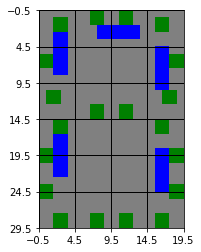

[16, 15, 225]
[7, 0, 270]
[16, 28, 135]
[2, 15, 315]
[7, 28, 90]
[11, 0, 270]
[1, 11, 45]
[11, 13, 270]
[16, 1, 225]
[0, 24, 0]
[2, 28, 45]
[17, 11, 135]
[11, 28, 90]
[2, 1, 315]
[0, 6, 0]
[0, 19, 0]
[18, 24, 180]
[18, 6, 180]
[18, 19, 180]
[7, 13, 270]


In [36]:
# create discrete colormap
cmap = colors.ListedColormap(['grey','blue','green'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(classroom, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-.5, class_x, 5))
ax.set_yticks(np.arange(-.5, class_y, 5))

plt.show()
for chair in chairs:
    print(chair)